<a href="https://colab.research.google.com/github/kanishquetyagi/Book-Recommendation-System/blob/main/Book_Recommendation_System_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In [ ]:
# import required libraries
import re
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## File path's

### Amit

In [ ]:
# # books file path
# books = pd.read_csv('')

# # users file path
# users = pd.read_csv('')

# # ratings file path
# ratings = pd.read_csv('')

### Anand

In [ ]:
# # books file path
# books = pd.read_csv('')

# # users file path
# users = pd.read_csv('')

# # ratings file path
# ratings = pd.read_csv('')

### Kanishque

In [ ]:
# # books file path
# books = pd.read_csv('')

# # users file path
# users = pd.read_csv('')

# # ratings file path
# ratings = pd.read_csv('')

### Sukruth

In [ ]:
# books file path
books = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/Book Recommendation System ( Unsupervised ML )/Resources/Books.csv')

# users file path
users = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/Book Recommendation System ( Unsupervised ML )/Resources/Users.csv')

# ratings file path
ratings = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/Book Recommendation System ( Unsupervised ML )/Resources/Ratings.csv')

## DATA Preprocessing

### Books data cleaning

In [ ]:
# look at the books data
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
# columns and data shape
print(f"Books dataset shape : {books.shape}")
print(f"Books columns: {list(books.columns)} " )

Books dataset shape : (271360, 8)
Books columns: ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'] 


In [ ]:
# Drop URL columns that arent required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
print(f'Books table after dropping the 3 Image-cols')
books.head()

Books table after dropping the 3 Image-cols


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
# Checking for null values
col_with_nulls = books.isnull().sum()
col_with_nulls

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

There are intotal 3 null values let us look at them and handle them

In [ ]:
# return indices of null values
b_null_items = [] 
for col in books.columns:
  b_null_items += books[books[col].isnull()].index.tolist()
print(f'The indices of null values are : {b_null_items}')

The indices of null values are : [187689, 128890, 129037]


In [ ]:
# items with missing data 
books.iloc[b_null_items]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
# fill the missing values with Other
books.iloc[b_null_items] = books.iloc[b_null_items].fillna('Other')

In [ ]:
# Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
# at Year-Of-Publication = DK Publishing Inc
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [ ]:
# at Year-Of-Publication = Gallimard
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


we have two different name values instead of year at ('DK Publishing Inc' & 'Gallimard')

In [ ]:
# well it's not just the years but also author and publisher names have been interchanged
# let's correct this by inserting the right values into them

# change values of book(209538)
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

# change values of book(221678)
books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[221678 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[221678 ,'Book-Author'] = 'James Buckley'

# change values of book(220731)
books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = 2003
books.at[220731 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[220731 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [ ]:
# confirming the change
for index in [209538,221678,220731]:
  print(books.iloc[index])
  print('-'*30)

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                           Michael Teitelbaum
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Name: 209538, dtype: object
------------------------------
ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                                James Buckley
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Name: 221678, dtype: object
------------------------------
ISBN                                               2070426769
Book-Title             Peuple du ciel - Suivi de Les bergers 
Book-Author                 

In [ ]:
# convert type to int
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int64')

Now that we have taken care of one issue of replacing the charecters with theier respective year, we still have to deal with books that were published in the future ....

In [ ]:
# before cleaning - sorted dates
sorted_book_dates = sorted(list(books['Year-Of-Publication'].unique()))
print(sorted_book_dates)

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


From the sorted list we can see that our fataset consists of books being published during " The Big Bang " (year-of-publication = 0)
and few from the future (year-of-publication > 2004),

Sadly as this dataset was published in 2004(so no books from the future...)

From the above list we can see that there are outliers in the dataset(year)

Text(0.5, 1.0, 'Box plot of Year-Of-Publication column before outlier removal')

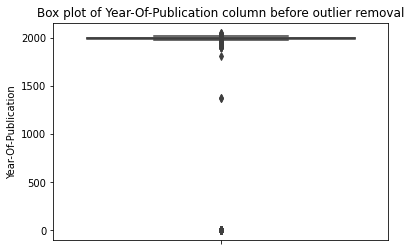

In [ ]:
# boxplot before handling outliers 
sns.boxplot(y='Year-Of-Publication', data=books)
plt.title('Box plot of Year-Of-Publication column before outlier removal')

In [ ]:
sorted_book_dates[:3]

[0, 1376, 1378]

In [ ]:
# book published during year 0 
books.loc[books['Year-Of-Publication']==sorted_book_dates[0]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates


Well that just looks like a typo/error during data entry

In [ ]:
# book published in 1376
books.loc[books['Year-Of-Publication']==sorted_book_dates[1]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz


[IsmaÂ°il Fasih's book - Tasht-i khun was published in the year - 1997](https://ferdosi.com/pages/product/?lang=en&product=0&id=964442011X&title=Tasht-i+khun&ntitle=%D8%B7%D8%B4%D8%AA+%D8%AE%D9%88%D9%86)

In [ ]:
books.loc[books['Year-Of-Publication']==sorted_book_dates[2]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus


[Nazi Safavi book - Dalan-i bihisht (Dastan-i Irani) was published in the year 1999](https://www.goodreads.com/author/show/5494214.Nazi_Safavi)

In [ ]:
# correcting years of books in dataset

# book - Tasht-i khun
books.loc[books['Year-Of-Publication']==sorted_book_dates[1], 'Year-Of-Publication'] = 1997
# book - Dalan-i bihisht (Dastan-i Irani)
books.loc[books['Year-Of-Publication']==sorted_book_dates[2], 'Year-Of-Publication'] = 1999

# replace the null and outliers with the mode(year-of-publication)
books.loc[(books['Year-Of-Publication'] > 2004) , 'Year-Of-Publication'] = 2002
books.loc[(books['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = 2002

In [ ]:
# after cleaning - sorted dates
print(sorted(list(books['Year-Of-Publication'].unique())))

[1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]


Text(0.5, 1.0, 'Box plot of Year-Of-Publication column after removing outliers')

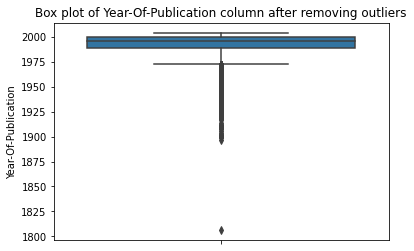

In [ ]:
# boxplot before handling outliers 
sns.boxplot(y='Year-Of-Publication', data=books)
plt.title('Box plot of Year-Of-Publication column after removing outliers')

after observing the unique years and the box plot we can confirm that our corrections have taken effect

Text(0.5, 1.0, 'Number of Books published each year ')

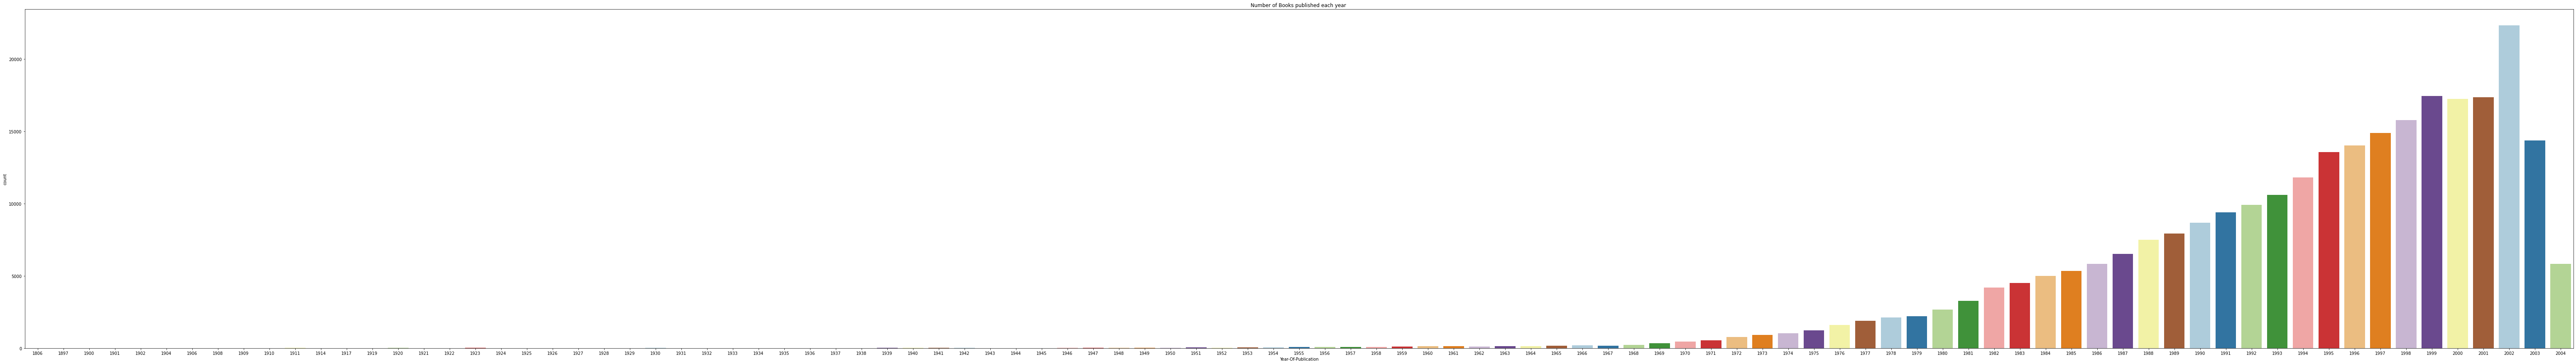

In [ ]:
  # plot the number of books published year-on-year
  plt.figure(figsize=(110,15))
  sns.countplot(x='Year-Of-Publication',data=books,palette='Paired')
  plt.title('Number of Books published each year ')

In [ ]:
# Upper casing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

In [ ]:
# Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)

# size of df after dropping
print(f'Shape of dataframe after dropping duplicates : {books.shape}')
print(f'Number of duplicates dropped are : {271360 - books.shape[0]}')

Shape of dataframe after dropping duplicates : (271047, 5)
Number of duplicates dropped are : 313


In [ ]:
# checking ISBN for special charecters
def specialCharDetector(d_frame,col_v):
  flag = 0
  reg = "[^A-Za-z0-9]"

  # loop through each item(isbn) in the given col
  for x in d_frame[col_v]:
      z = re.search(reg,x)    
      if z:
          flag = 1
  # if flag is set to 1 then there are special charecters
  if flag == 1:
      print(f" Special charecters found in {col_v}")
  else:
      print(f" No special charecters found in {col_v}")

In [ ]:
specialCharDetector(books,'ISBN')

 Special charecters found in ISBN


[but isbn mustn't contain special charecters ](http://www-math.ucdenver.edu/~wcherowi/jcorner/isbn.html)

In [ ]:
# removing extra characters from ISBN (from ratings dataset) existing in books dataset
def removeSpecialChar(df_):
  bookISBN = df_['ISBN'].tolist() 
  reg = "[^A-Za-z0-9]" 
  for index, row_Value in df_.iterrows():
      z = re.search(reg, row_Value['ISBN'])    
      if z:
          f = re.sub(reg,"",row_Value['ISBN'])
          if f in bookISBN:
              df_.at[index , 'ISBN'] = f

In [ ]:
# remove special charecters
# removeSpecialChar(books)

In [ ]:
# count plot values on required axis based off  on the dataframe
def CountPlotN(col,data,n,title,axis_flag=0):
  
  ''' count plot values on required axis
  axis_flag - specify axis-(0)=y_axis ; (1)=x_axis, 
  data - dataframe,
  n - select the topN values to be displaced
  title - specify the title to be displayed '''

  plt.figure(figsize=(15,7))
  order = pd.value_counts(data[col]).iloc[:n].index
  # change axis based on flag
  if axis_flag:
    sns.countplot(x=col,data=data,order=order,palette='Paired')
  else:
    sns.countplot(y=col,data=data,order=order,palette='Paired')
  plt.title(title)

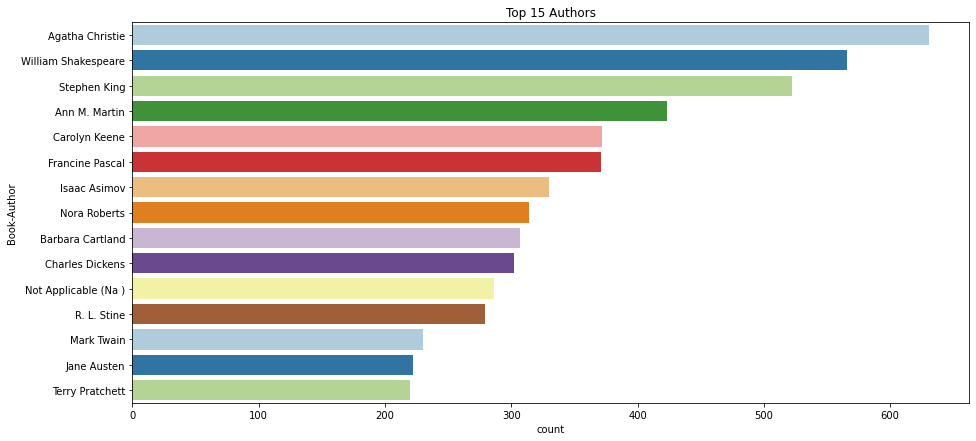

In [ ]:
# plot the author whose books were read the most
CountPlotN('Book-Author',books,15,'Top 15 Authors')

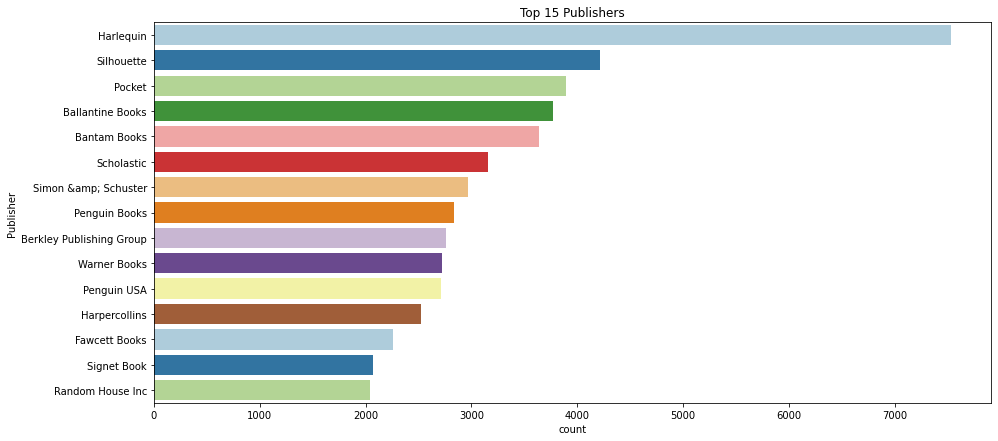

In [ ]:
# publishers whoose books were read by the most readers
CountPlotN('Publisher',books,15,'Top 15 Publishers')

### Users data cleaning

In [ ]:
# look at the users
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
print(f" Users dataset shape: {users.shape}")
print(f" Columns of users dataset : {list(users.columns)}")

 Users dataset shape: (278858, 3)
 Columns of users dataset : ['User-ID', 'Location', 'Age']


In [ ]:
# Checking for null values
print(users.isna().sum())   

User-ID          0
Location         0
Age         110762
dtype: int64


In [ ]:
# Check for all unique values present in Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Text(0.5, 1.0, 'Distribution Plot of users age ')

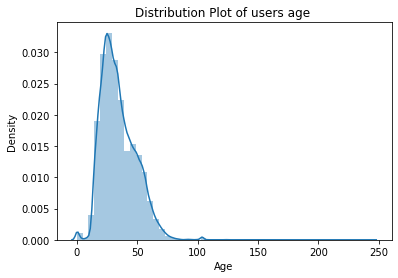

In [ ]:
# Dist Plot of users age
sns.distplot(users.Age)
plt.title('Distribution Plot of users age ')

In [ ]:
# CountPlotN('Age',users,len(users),'bal',1)

### From the above list we can see that there are outliers in the dataset(age)

Text(0.5, 1.0, 'Box plot of Age column before outlier removal')

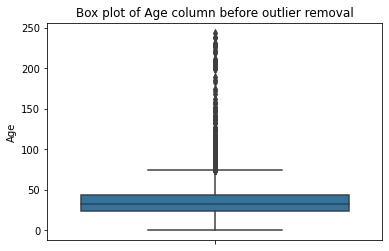

In [ ]:
# boxplot before handling outliers 
sns.boxplot(y='Age', data=users)
plt.title('Box plot of Age column before outlier removal')

In [ ]:
# claclulate the mean users age 
mean_user_age = round( users[(users['Age'] <= 90) & (users['Age'] >= 10)]['Age'].mean())
mean_user_age

35

In [ ]:
# outliers with age grater than 80 & age less than 10 years are substitued with mean users age
users.loc[(users['Age'] > 90) | (users['Age'] < 10 ), 'Age'] = mean_user_age
# filling null values with mean
users['Age'] = users['Age'].fillna(mean_user_age)     
# finally changing Datatype to int
users['Age'] = users['Age'].astype(int)       

In [ ]:
# double check to see if missing values are present
users['Age'].isna().sum()

0

Text(0.5, 1.0, 'Distribution Plot of users age after mean replacement')

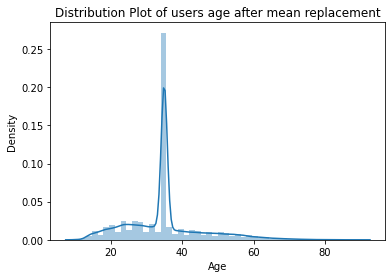

In [ ]:
# Dist Plot of users age after fillings missing values and treating outliers
sns.distplot(users.Age)
plt.title('Distribution Plot of users age after mean replacement')

Text(0.5, 1.0, 'Box plot of Age column after removing outliers')

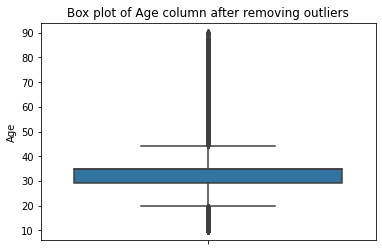

In [ ]:
# boxplot after handling outliers 
sns.boxplot(y='Age', data=users)
plt.title('Box plot of Age column after removing outliers')

In [ ]:
# CountPlotN('Age',users,len(users),'bal',1)

Well we have successfully handled the removal of all the existing null values in the age column

In [ ]:
# in the dataset allthe city-state-country are gropued together 
# the code below will help split these into their respective categorys and add them into the df as cols

# split users location
list_ = users.Location.str.split(', ')

# lists of city,state & country
city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

# remove invalid entries too
for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',': 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())

# drop the locations col
users = users.drop('Location',axis=1)

temp = []
for ent in city:
    # handling cases where city/state entries from city list as state is already given 
    c = ent.split('/')            
    temp.append(c[0])

# create respective dataframes
df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

# add these newly created df to users df
users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

# printing the number of countries didnt have any values 
print(count_no_country) 
# printing the states which didnt have any   
print(count_no_state)     

4659
16044


In [ ]:
# Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

# size of df after dropping
print(f'Shape of dataframe after dropping duplicates : {users.shape}')
print(f'Number of duplicates dropped are : {278858 - users.shape[0]}')

Shape of dataframe after dropping duplicates : (278858, 5)
Number of duplicates dropped are : 0


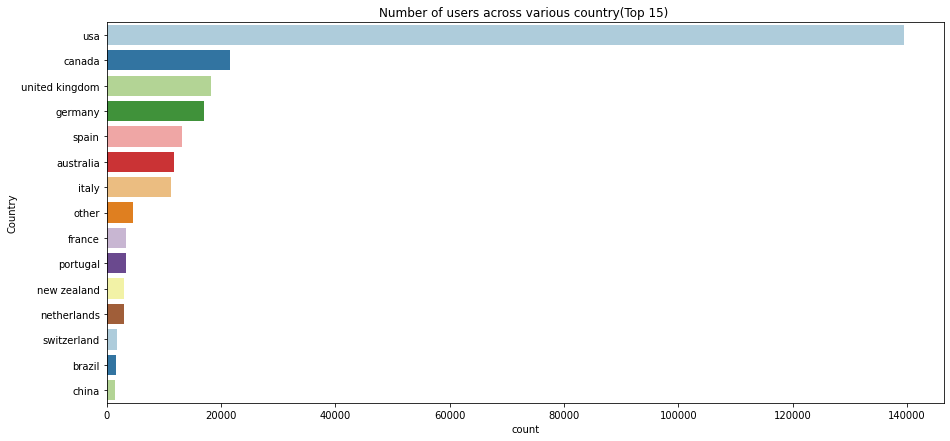

In [ ]:
# readers across various countries
CountPlotN('Country',users,15,'Number of users across various country(Top 15) ')

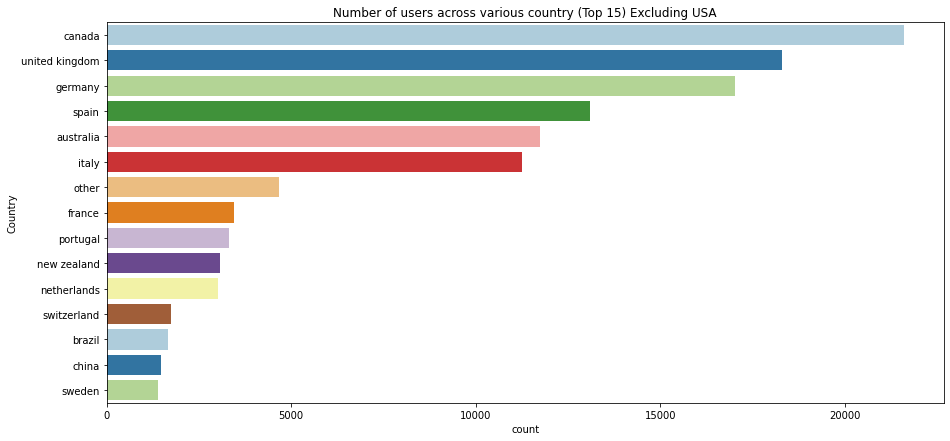

In [ ]:
# excluding USA
CountPlotN('Country',users[users['Country']!='usa'],15,'Number of users across various country (Top 15) Excluding USA')

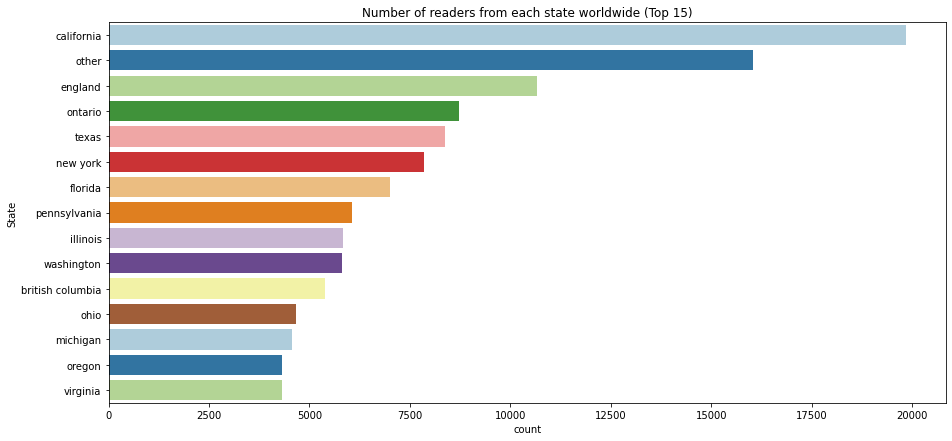

In [ ]:
# states with most readers globally
CountPlotN('State',users,15,'Number of readers from each state worldwide (Top 15)')

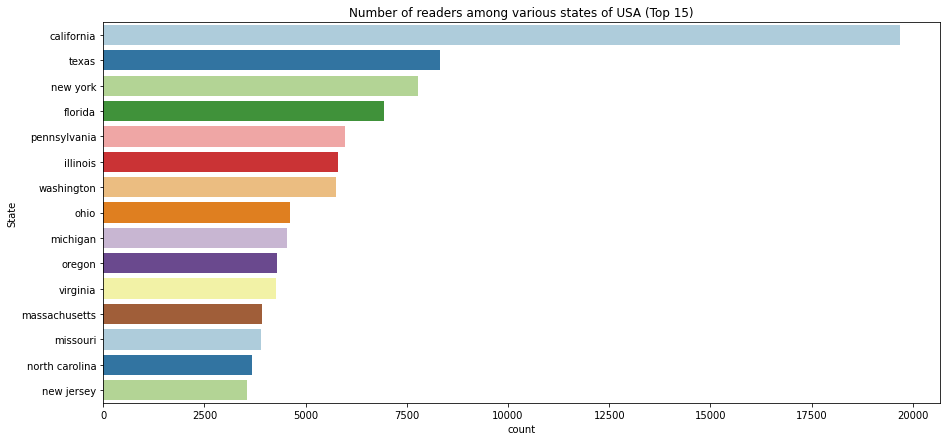

In [ ]:
# states with most readers statewise in usa
CountPlotN('State',users[users['Country']=='usa'],15,'Number of readers among various states of USA (Top 15)')

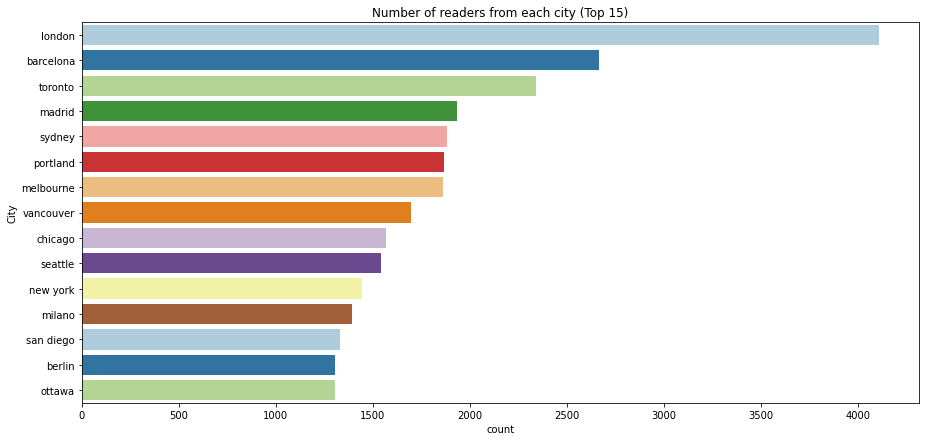

In [ ]:
# cities with most readers
CountPlotN('City',users,15,'Number of readers from each city (Top 15)')

### Ratings data cleaning

In [ ]:
# look at the ratings data
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
print(f"Book-ratings Data : {ratings.shape}" )
print(f"Columns: {list(ratings.columns)}" )

Book-ratings Data : (1149780, 3)
Columns: ['User-ID', 'ISBN', 'Book-Rating']


In [ ]:
# Checking for null values
ratings.isnull().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
# checking User-ID & ratings contains only number or not
print(is_numeric_dtype(ratings['Book-Rating']))
print(is_numeric_dtype(ratings['User-ID']))

True
True


In [ ]:
# checking ISBN
specialCharDetector(ratings,'ISBN')

 Special charecters found in ISBN


In [ ]:
# remove special chars from isbn in ratings
# removeSpecialChar(ratings)

In [ ]:
# Uppercasing all alphabets in ISBN
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [ ]:
# Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

# size of df after dropping
print(f'Shape of dataframe after dropping duplicates : {ratings.shape}')
print(f'Number of duplicates dropped are : {1149780 - ratings.shape[0]}')

Shape of dataframe after dropping duplicates : (1149780, 3)
Number of duplicates dropped are : 0


In [ ]:
# frequntly used rating value
# CountPlotN('Book-Rating',ratings,15,'most frequnt rating value')

the value for '0' seems to be dominant

In [ ]:
#Hence segragating implicit-0 and explict(~ 0) ratings datasets
non_zero_ratings = ratings[ratings['Book-Rating'] != 0]
zero_rating = ratings[ratings['Book-Rating'] == 0]

In [ ]:
# frequntly used rating value
# CountPlotN('Book-Rating',non_zero_ratings,15,'most frequnt rating value excluding zero')

### Merging of all three Tables
(Merging Books, Users and Rating Tables into One)

In [ ]:
# merging all three dataframes
df = pd.merge(books, non_zero_ratings, on='ISBN', how='inner')
df = pd.merge(df, users, on='User-ID', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383958 entries, 0 to 383957
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 383958 non-null  object
 1   Book-Title           383958 non-null  object
 2   Book-Author          383958 non-null  object
 3   Year-Of-Publication  383958 non-null  int64 
 4   Publisher            383958 non-null  object
 5   User-ID              383958 non-null  int64 
 6   Book-Rating          383958 non-null  int64 
 7   Age                  383958 non-null  int64 
 8   City                 383958 non-null  object
 9   State                383958 non-null  object
 10  Country              383958 non-null  object
dtypes: int64(4), object(7)
memory usage: 35.2+ MB


In [ ]:
# head of new dataframe
# df.head()

In [ ]:
# final check for null values across the new df
# df.isna().sum().sum()

## Recommender Systems

### 1. Popularity Based (Most-Read / Max-Rated)

In [ ]:
# fucntion that returns a df based on either on most read or most rated
def popularityBasedMaxR(data_frame, n,count_flag=0):
    # procedd only if n is greater than 0 and less than the df-length 
    if n >= 1 and n <= len(data_frame):
      # decide to take ratings sum or count 
      if count_flag :
        # grouop df on each ISBN, and count it's occurances
        series_data = data_frame.groupby('ISBN')['Book-Rating'].count()
      else:
        # group df on each ISBN, and add it's rating 
        series_data = data_frame.groupby('ISBN')['Book-Rating'].sum()
      # sort the values descendingly and create a new df - choose the number of items required
      data = pd.DataFrame(series_data).sort_values('Book-Rating', ascending=False).head(n)
      # merge the new dataframe and books df on ISBN
      result = pd.merge(data, books, on='ISBN', left_index = True)
      return result
    # incase of error
    return "Invalid number of books entered!!"

In [ ]:
# number of books to be recomended
recomm_number = 5 #int(input(" Enter number of books to be recommended : "))

In [ ]:
# book_rating_count = df.groupby('ISBN')['Book-Rating'].count()
print(f"Top {recomm_number} books based on most number of readers are: ")
popularityBasedMaxR(df, recomm_number,1)

Top 5 books based on most number of readers are: 


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
401,0316666343,707,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
26,0971880107,581,Wild Animus,Rich Shapero,2004,Too Far
734,0385504209,488,The Da Vinci Code,Dan Brown,2003,Doubleday
513,0312195516,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
1086,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


In [ ]:
# book_rating_sum = df.groupby('ISBN')['Book-Rating'].sum()
print(f"Top {recomm_number} books based on highest total ratings recieved are: ")
popularityBasedMaxR(df, recomm_number)

Top 5 books based on highest total ratings recieved are: 


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
401,0316666343,5787,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
734,0385504209,4112,The Da Vinci Code,Dan Brown,2003,Doubleday
513,0312195516,3134,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
77151,059035342X,2815,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
352,0142001740,2655,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books


Above two dataframes represent most read books and highest voted books although the first book seems to be common in both but we see that even though 'The Da Vinci Code' was read by less people compared to 'Wild Animus' it still holds the second spot on the most rated books whereas the book 'Wild Animus' itn't among the top 5 most rated books. further down the list we can see few differences among both the dataframes

### 2. Location Based (Most read/popular in the given location)

In [ ]:
# that searches for most read/most voted books in a region
def searchLocation(dataframe, place):
    ''' A function that takes in a Dataframe and placename, then is given out a
     dataframe that contains data of books based on the given location '''
    place = place.lower()
    # check for country
    if place in (dataframe['Country'].unique()):
        return dataframe[dataframe['Country'] == place]
    # check for state
    elif place in (dataframe['State'].unique()):
        return dataframe[dataframe['State'] == place]
    # check for city
    elif place in (dataframe['City'].unique()):
        return dataframe[dataframe['City'] == place]
    else:
        return "Invalid Entry"

In [ ]:
place = 'India' #input("Enter the name of place: ")
# place - examples India / USA or any Other country
data = searchLocation(df, place)

# check if data(location based df) is a dataframe
if not isinstance(data, pd.DataFrame):
    print('No books found in your specified area')
else:
    # run the popularity model based on most rated at given location
    data = popularityBasedMaxR(data, recomm_number,1)
    print(f'Highest Rated book(s) in {place} are : ')
data

Highest Rated book(s) in India are : 


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,3,Wild Animus,Rich Shapero,2004,Too Far
166,0671047612,2,Skin And Bones,Franklin W. Dixon,2000,Aladdin
164,0486284735,2,Pride and Prejudice (Dover Thrift Editions),Jane Austen,1995,Dover Publications
9596,8171670407,2,Inscrutable Americans,Mathur Anurag,1996,South Asia Books
72379,0006944035,1,Secret Island / Secret Mountain (Two-in-ones),Enid Blyton,1994,HarperCollins Publishers


### 3. Books by Author or Publisher

In [ ]:
# print books of a dataframe
def printBook(k, n):
  ''' a function that prints n required books
      k - dataframe,
      n - number of top n elements '''
  # get a set of names of books present in the df(k)
  z = k['Book-Title'].unique()
  # loop through book titles and print them
  for x in range(len(z)):
        print(z[x])
        if x >= n-1:
            break

In [ ]:
# get books suggestions of pirticular author or publisher
def getBooks(dataframe, name, n, col_name):
  ''' taking a dataframe as input,name= bookname, 
      n = number of top n elements required,
      col_name = columns_name of author or publisher '''

  print(f"\nBooks by same {col_name}:\n")
  # a list of all authors/publishers for requested books
  name_list = dataframe[col_name].unique()
  # print('1')
  # exclude the requested book from suggestions
  data = df[df['Book-Title'] != name]
  # print('2')          
  # check if author/publisher name is in the dataframe
  if name_list[0] in data[col_name].unique(): 
    # a df(k) that contain books of chosen author/publisher
    k = data[data[col_name] == name_list[0]]
  # sort and print the df(k)
  k = k.sort_values(by=['Book-Rating'])
  printBook(k, n)

In [ ]:
bookName = input("Enter a book name: ")
# ex - Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

# check if book exists in the set of book-titles
if bookName in list(df['Book-Title'].unique()):
    # send a df of the requested book
    d = df[df['Book-Title'] == bookName]
    # loop the function and print out publishers and authors
    for col_name in ['Book-Author', 'Publisher']:
      getBooks(d, bookName, recomm_number, col_name)
      print('-'*30)
else:
    # in case the requested book does not exist in the dataset
    print("Oops!! the requested book does not seem to be present ")


Enter a book name: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

Books by same Book-Author:

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter y el cÃ¡liz de fuego
Harry Potter and the Prisoner of Azkaban (Book 3)
------------------------------

Books by same Publisher:

The Seeing Stone
The Slightly True Story of Cedar B. Hartley: Who Planned to Live an Unusual Life
The Story of the Seagull and the Cat Who Taught Her To Fly
Harry Potter and the Chamber of Secrets (Harry Potter)
Book! Book! Book!
------------------------------


### 4. Books by Yearly popularity


In [ ]:
# data = pd.DataFrame(df.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False)
# data = pd.merge(data, books, on='ISBN', left_index = True)

# display all columns and rows
pd.set_option("display.max_rows", None, "display.max_columns", None)
# selecting book with most ratings at the top
max_rating_df = popularityBasedMaxR(df, len(df),1)

years = set()
indices = []
# loop through the max-rating df
for ind, row in max_rating_df.iterrows():
    # append to indices if the publication-year is found in years-list
    if row['Year-Of-Publication'] in years:
        indices.append(ind)
    else:
        # add to years
        years.add(row['Year-Of-Publication'])

# sort and restructure df based on publication-year
data = max_rating_df.drop(indices)
data = data.drop('Book-Rating', axis = 1)
data = data.sort_values('Year-Of-Publication')

print('Most Popular books across various years are :')
data

Most Popular books across various years are :


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
171529,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806,Reprint Services Corp
211547,1551103982,The Cycling Adventures of Coconut Head: A Nort...,Ted Schredd,1900,Graphic Arts Center Pub Co
262204,0671397214,JOY OF MUSIC P,Leonard Bernstein,1901,Fireside
102242,0373226888,Tommy's Mom,Linda O. Johnston,1902,Harlequin
45599,038528120X,CATCH 22,JOSEPH HELLER,1904,Delta
170683,0404089119,Charlotte Bronte and Her Sisters,Clement K. Shorter,1906,Ams Pr
159472,0911662251,Kybalion: A Study of the Hermetic Philosophy o...,Three Initiates,1908,Yoga Publication Society
191891,0892760508,New Birth,Kenneth Hagin,1911,Faith Library Publications
8369,0684717603,The GREAT GATSBY (Scribner Classic),F. Scott Fritzgerald,1920,Scribner Paper Fiction
60245,0440745454,HOW TO EAT FRIED WORMS,THOMAS ROCKWELL,1923,Yearling


The above dataframe consists of data of various books,authors,publishers who have recieved the highest ratings in the pirticular year thus this data can be usefull if there were to be a pattern set in the data, that could further increase the sales of a pirticular books

### 5. Books by Average Weighted Ratings

In the above cases we have seen models that rank books on either the number of readers or the most rated ones this model is an extension of that to ensure that instead of soley relying on one we can use the weighted average concept to make a better model

In [ ]:
# create a copy of df(average rating df)
avg_r_df = df.copy()
# calculate the average ratings
avg_r_df['Average Rating']=df.groupby('ISBN')['Book-Rating'].transform('mean')
# calculate the total ratings given every book
avg_r_df['Total-Ratings']=avg_r_df.groupby('ISBN')['Book-Rating'].transform('count')
# show average-rating-dataframe
avg_r_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country,Average Rating,Total-Ratings
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,35,timmins,ontario,canada,7.666667,9
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,35,timmins,ontario,canada,5.000000,1
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,35,timmins,ontario,canada,5.000000,1
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,35,timmins,ontario,canada,5.000000,1
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,35,timmins,ontario,canada,6.000000,1


In [ ]:
# mean_ratin - Mean vote across the whole
mean_ratin = avg_r_df['Average Rating'].mean()

# Minimum number of votes required to be in the chart
# choose the top 90 percentile of the data
m = avg_r_df['Total-Ratings'].quantile(0.90)
print(f'C={mean_ratin} , m={m}')

# choosing total ratings in dataset greater than the 90th percentile
avg_r_90_percent = avg_r_df.loc[avg_r_df['Total-Ratings'] >= m]
# print the average-rating-dataframe 90th percentile
print(f'The data shape of average ratings df before slicinng based on 90 percentile {avg_r_df.shape} after slicing {avg_r_90_percent.shape}')

C=7.626797722667526 , m=65.0
 the data shape of average ratings df before slicinng based on 90 percentile (383958, 13) after slicing (38515, 13)


In [ ]:
# calc the weighted average of books 
def weightedRating(x, m=m, C=mean_ratin): 
    ''' returns weighted avarage of items, taken is x = dataframe,
        m = top 90 percentile data, c = mean-rating of the dataset'''
    #  v - number of votes
    v = x['Total-Ratings'] 
    # R - Average Rating     
    R = x['Average Rating']   
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# calc score(weighted_average)
avg_r_90_percent['Score'] = avg_r_90_percent.apply(weightedRating, axis=1)
# sort based on the best ones(highest-weighted-avg)
avgwr_df = avg_r_90_percent.drop_duplicates('ISBN').sort_index()
#Sorting books based on score calculated above
avgwr_df = avgwr_df.sort_values('Score', ascending=False)
recomm_number =5
print("Book recommendation based of on Weighted Average ratings :-\n")
# choose the required nummber of books
avgwr_df[['Book-Title', 'Total-Ratings', 'Average Rating', 'Score']].reset_index(drop=True).head(recomm_number)

# avgwr_df.shape

Book recommendation based of on Weighted Average ratings :-



,Book-Title,Total-Ratings,Average Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.736346
1,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,8.712479
2,Harry Potter and the Order of the Phoenix (Boo...,207,9.038647,8.701257
3,To Kill a Mockingbird,214,8.943925,8.637068
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.604757


### 6. Collaborative Filtering 

User-Item based filtering

Upto this point we have used models that only consider wither ratings or users as its sole recommending criteria now lets branch out to an even more sophisticated model that compares users-items and then provides suggestions

In [ ]:
# drop unwanted cols 
required_df = avg_r_df.drop(['Year-Of-Publication','Publisher','Age','City','State','Country'], axis=1)

# set a threshold 
popularity_threshold = 50
# choose only books those have their total-rating above 50
popular_book = required_df[required_df['Total-Ratings'] >= popularity_threshold]
# reset the indedices as books below threshold were dropped
popular_book = popular_book.reset_index(drop = True)

In [ ]:
# create a test df
testdf = pd.DataFrame()

# based on respective book group all the users and ratings given to it
testdf = popular_book[['User-ID','Book-Rating']].groupby(popular_book['ISBN'])
# testdf.head()

# list that contain dicts(Users & Ratings)
listOfDictonaries=[]
# pointers and their mapping to ISBN's
indexMap = {}
# the reverse mapping of indexMap
reverseIndexMap = {}
# counter/pointer
ptr=0

# loop each isbn(gropkey) in the testdf
for groupKey in testdf.groups.keys():
    # temporary storing of each book's users and ratingvalue
    tempDict={}
    # assign all common users and ratings for an ISBN
    groupDF = testdf.get_group(groupKey)

    for i in range(0,len(groupDF)):
        # in temp dict for a pirticular book make the user as key and rating as value
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    # map pointer as key and ISBN as value
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    # increment pointer after each ISBN
    ptr=ptr+1
    # append users and rating for each isbn
    listOfDictonaries.append(tempDict)

# instance of DictVectorizer
dictVectorizer = DictVectorizer(sparse=True)
# Transforms lists of feature-value mappings to vectors
vector = dictVectorizer.fit_transform(listOfDictonaries)
# calcluate cosie similarity of vector # dot prod
pairwiseSimilarity = cosine_similarity(vector)

In [ ]:
# print book names
def printBookDetails(bookID):
    # match isbn and print the repective name
    print(df[df['ISBN']==bookID]['Book-Title'].values[0])


#  get top recommendations
def getTopRecommandations(bookID):
    # a list of movie names
    collaborative = []
    # get the index of given book ISBN
    row = reverseIndexMap[bookID]
    # print the given book detail
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    count = 0
    # a list of similar books
    similar = []
    # for the given index(row) in array(pairwise similarites) return similar indices
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          # proceed if the index(i) isnt in similar
          if df[df['ISBN']==indexMap[i]]['Book-Title'].values[0] not in similar:
                # break if the count exceeds the required number of books
                if count>=recomm_number:
                      break
                count+=1
                # else append title into similar and colabrative lists
                book_title = df[df['ISBN']==indexMap[i]]['Book-Title'].values[0]
                similar.append(book_title)
                collaborative.append(book_title)
                printBookDetails(indexMap[i])

    # return list of books
    return collaborative

In [ ]:
# list of titles
k = list(df['Book-Title'])
# list of book ids
m = list(df['ISBN'])

bookName = "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"#input("Enter a book name: ")
# ex - Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

# check if book exists in the set of book-titles
if bookName in k:
  print(f'The top {recomm_number} recomendations based on input using Colabrative Filtering \n')
  collaborative = getTopRecommandations(m[k.index(bookName)])
else:
  # in case the requested book does not exist in the dataset
  print("Oops!! the requested book does not seem to be present ")

The top 5 recomendations based on input using Colabrative Filtering
Input Book:
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

RECOMMENDATIONS:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Chamber of Secrets (Book 2)
Anne of Green Gables (Anne of Green Gables Novels (Paperback))


### 7. Correlation Based Filtering

In [ ]:
# set threshold
minimum_threshold = 50
# how many books a pirticular user has read
user_count = df['User-ID'].value_counts()
# choose users who have read more than 50 books
data = df[df['User-ID'].isin(user_count[user_count >= minimum_threshold].index)]
# number of times a book was rated
rat_count = data['Book-Rating'].value_counts()
# choose books that have read more than 50 ratings
data = data[data['Book-Rating'].isin(rat_count[rat_count >= minimum_threshold].index)]

# create a pivot table using bookratings
matrix = data.pivot_table(index='User-ID', columns='ISBN', values = 'Book-Rating').fillna(0)
# print('the created Pivot Table of users vs boooks(isbn) using book-ratings')
# matrix

In [ ]:
# calculate average rating
average_rating = pd.DataFrame(df.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,Book-Rating,ratingCount
ISBN,,
0971880107,4.390706,2502
0316666343,8.185290,1295
0385504209,8.426230,884
0060928336,7.887500,732
0312195516,8.182768,723


In [ ]:
# for given book name find isbn
isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
# find the isbn in the pivot-table(matrix)
row = matrix[isbn]
# find correlation(pearson's) with others in the matrix 
correlation = pd.DataFrame(matrix.corrwith(row), columns = ['Pearson Corr'])
# join the correlation df with average df
corr = correlation.join(average_rating['ratingCount'])

# sort values based on pearson correlation val - choose top 5
res = corr.sort_values('Pearson Corr', ascending=False).head(recomm_number+1)[1:].index
# merge this resilt with books df 
corr_books = pd.merge(pd.DataFrame(res, columns = ['ISBN']), books, on='ISBN')
print("\n Recommended Books using Correlation based filtering: \n")
corr_books


 Recommended Books using Correlation based filtering: 



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
1,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic
2,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
3,0804115613,Fried Green Tomatoes at the Whistle Stop Cafe,Fannie Flagg,2000,Ballantine Books
4,0439139600,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2002,Scholastic Paperbacks


### 8. Nearest Neighbours Based Filtering

### can reduce lines from 3 onwards

In [ ]:
# group data on title with the no of times rated
data = (df.groupby(by = ['Book-Title'])['Book-Rating'].count().reset_index().
        rename(columns = {'Book-Rating': 'Total-Rating'})[['Book-Title', 'Total-Rating']])

# merge this on df
result = pd.merge(data, df, on='Book-Title', left_index = True)
# select items above the threshold (50)
result = result[result['Total-Rating'] >= popularity_threshold]
result = result.reset_index(drop = True)
# create a pivot table using bookratings
matrix = result.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
# create a sparse row matrix
up_matrix = csr_matrix(matrix)
up_matrix

<653x24894 sparse matrix of type '<class 'numpy.float64'>'
	with 65194 stored elements in Compressed Sparse Row format>

In [ ]:
# nearest neighbours model 
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(up_matrix)

# for the given book name find nearest-neighbours
distances, indices = model.kneighbors(matrix.loc[bookName].values.reshape(1, -1), n_neighbors = recomm_number+1)
print("\nRecommended books using Nearest Neighbours:\n")
# based off on distance print the book names
for i in range(0, len(distances.flatten())):
    # skip for value 0 as it's the same book
    if i > 0:
        print(matrix.index[indices.flatten()[i]]) 


Recommended books using Nearest Neighbours:

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
The Fellowship of the Ring (The Lord of the Rings, Part 1)


### 9. Content Based Filtering


In [ ]:
popularity_threshold = 80
# choose books with total ratings above 80 and reset indicies
popular_book = required_df[required_df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(31176, 7)

In [ ]:
# extract unigrams and bigrams and cutoff document below threshold finally remove stopwords
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
# fit on title
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(31176, 911)

In [ ]:
# typecast to float 32
normalized_df = tfidf_matrix.astype(np.float32)
# find cosine similarity between values
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(31176, 31176)

In [ ]:
print("Recommended Books using Content:\n")
# get isbn from bookname
isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
# list of content based recommended books  
content = []
# find index of book
idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
# find similar indicies
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
# loop theough indices
for i in similar_indices:
    # enter if block only if the found book's names isn't the original name and isnt present in similar items and  len of similar_items is less than the requies number of books
    if popular_book['Book-Title'][i] != bookName and popular_book['Book-Title'][i] not in similar_items and len(similar_items) < recomm_number:
        # append the bookname to 2 lists
        similar_items.append(popular_book['Book-Title'][i])
        content.append(popular_book['Book-Title'][i])

# print similar books
for book in similar_items:
    print(book)

Recommended Books using Content:

Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Order of the Phoenix (Book 5)


### 10. Hybrid Approach (Content and Collaborative)

In [ ]:
z = list()
k = float(1/recomm_number)
for x in range(recomm_number):
      z.append(1-k*x)

dictISBN = {}
for x in collaborative:
      dictISBN[x] = z[collaborative.index(x)]

for x in content:
    if x not in dictISBN:
        dictISBN[x] = z[content.index(x)]
    else:
        dictISBN[x] += z[content.index(x)]

ISBN = dict(sorted(dictISBN.items(),key=operator.itemgetter(1),reverse=True))
w=0
print("Input Book:\n")
print(bookName)
print("\nRecommended Books:\n")
for x in ISBN.keys():
    if w>=recomm_number:
        break
    w+=1
    print(x)

Input Book:

Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

Recommended Books:

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Order of the Phoenix (Book 5)
